In [231]:
print("Boom Bikes Assignment Notebook : Ashish Arora - DS c45")

Boom Bikes Assignment Notebook : Ashish Arora - DS c45


<h1 style = color:#000080 > <span style='font-family:Georgia' > <center>Boom Bikes Demand Forecasting using Multiple Linear Regression</center></span></h1>

<img src="https://th.bing.com/th/id/OIP.79iQd-DEXhkjk9bWYDn8zAHaEy?pid=ImgDet&rs=1" class="img-thumbnail" alt="Cinque Terre">


<div class="alert alert-success" style = color:#000080>
    <span style='font-family:Georgia' >
        <b>Busines Problem: </b><br><br><b>A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.
Company wants to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.</b>     

<b>The company wants to know:</b><br>

- <b>Which variables are significant in predicting the demand for shared bikes.</b>
- <b>How well those variables describe the bike demands</b>   </span>
</div>

# Importing the necessary Python Packages

In [232]:
# For doing genaral Operations with Dataset
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for Supressing the Warings
import warnings
warnings.filterwarnings("ignore")

# stats
from scipy import stats

# for date
import datetime

In [233]:
## Changing Jupyter view options
pd.options.display.max_rows = 10000
pd.options.display.max_colwidth = 100000
pd.options.display.max_columns= 122
pd.set_option('float_format', '{:f}'.format)


## Understanding Dataset with data Dictionary

- Keeping the note and eye on the Indipendant & dependant Variables
### Independent Variables
	
- **instant**    : record index
- **dteday**     : date
- **season**     : season (1:spring, 2:summer, 3:fall, 4:winter)
- **yr**         : year (0: 2018, 1:2019)
- **mnth**       : month ( 1 to 12)
- **holiday**    : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **weekday**    : day of the week
- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit** : 
		1. Clear, Few clouds, Partly cloudy, Partly cloudy
		2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**       : temperature in Celsius
- **atemp**      : feeling temperature in Celsius
- **hum**        : humidity
- **windspeed**  : wind speed

# Reading & Inspecting the Data

In [234]:
# load data

bike = pd.read_csv("day.csv")

In [235]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.181250,80.583300,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.686950,69.608700,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.470250,43.727300,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.606100,59.043500,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.463500,43.695700,12.522300,82,1518,1600


In [236]:
# Inspecting shape of loaded data
print("Bike day data shape = ", bike.shape)

Bike day data shape =  (730, 16)


In [237]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [238]:
bike.dtypes.value_counts()

int64      11
float64     4
object      1
dtype: int64

In [239]:
# checking duplicate rows

In [240]:
bike.drop_duplicates(subset=None).shape

(730, 16)

### Data Understanding:

- **There are no null values in the data**
- **730 rows and 16 columns are there in total**
- **There are some features which are categorical in nature, but are present in int/float type.**
- **There are no duplicated rows.**

# Data Wrangling:
   - Removing unwanted columns
   - Munging columns to new format and mapping to its precise definition.

# Removing unwanted columns

In [241]:
# Removing Redundant/Unwanted/Irrelevant Columns

unwanted=['instant','registered','casual']

bike.drop(unwanted, axis =1, inplace= True)

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

1. __instant__ : Its only an index value

2. __casual & registered__ : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. 

3. Will delete after making months

# Munging columns to new format and mapping to its precise definition.

#### 1.Season

In [242]:
bike["season"]= bike["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

#### 2. Mnth

In [243]:
bike.dteday = pd.to_datetime(bike.dteday, format='%d-%m-%Y')
bike["mnth"] = bike.dteday.apply(lambda x:x.strftime("%b"))

In [244]:
### No further need of dteday, hence drop it

In [245]:
bike.drop("dteday", axis =1, inplace= True)

#### 3. weathersit  

In [246]:
def check(x):
    if x == 1:
         return "Clear"
    elif x ==2:
        return "Mist"
    elif x == 3:
        return "Light-Snow/Rain"
    else:
        return "Heavy-Snow/Rain"


bike["weathersit"] = bike["weathersit"] = bike.weathersit.apply(check)

# Feature Engineering

### Derived Weekend, using Weekday and Workingday:  

In [247]:
bike["weekday"][bike["workingday"]==0].value_counts()

6    104
0    104
3     11
2      5
4      1
5      1
Name: weekday, dtype: int64

**When it is not working day, then majorly it is weekend, i.e. saturday and sunday.**

In [248]:
pd.pivot_table( bike[bike["workingday"]==0], values = ["cnt"], index = "weekday", aggfunc = np.sum)

,cnt
weekday,
0,485235
2,30194
3,30424
4,7403
5,2425
6,481176


**To prove the above fact, the given analysis also states that number of bike rent is high on these two days, if it is not working day.**

In [249]:
pd.pivot_table( bike[bike["workingday"]==1], values = ["cnt"], index = "weekday", aggfunc = np.sum)

,cnt
weekday,
1,447281
2,418628
3,431852
4,480520
5,475707


**The given table, states that if it is working daya then the demand for bike rent is alsmost same these 5 days.**

In [250]:
pd.pivot_table( bike[ (bike["weekday"] !=0) &  (bike["weekday"] !=6)] , values = ["cnt"], index = "weekday", aggfunc = np.sum)

,cnt
weekday,
1,447281
2,448822
3,462276
4,487923
5,478132


**The given table shows total demand for non weekend, no matter it is working day or not which states that sales is almost same wether it is working day or not.**


- weekday(6,0) are weekends
- on weekdays, almost same proportion of demand.
- same as the case for weekend
- Hence, i am converting the weekeday to being weekend or not
- Moreover, it is also mentioned in data dictionary, working day is what that is neither holiday nor weekend.

In [251]:
bike["weekend"] = bike["weekday"].apply( lambda x: 1 if x in [0,6] else 0)

In [252]:
(bike["weekend"]==1).sum()

208

#### Dropping weekday column

In [253]:
bike.drop("weekday", axis =1, inplace = True)

In [254]:
bike.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekend
0,spring,0,Jan,0,1,Mist,14.110847,18.181250,80.583300,10.749882,985,0
1,spring,0,Jan,0,1,Mist,14.902598,17.686950,69.608700,16.652113,801,0
2,spring,0,Jan,0,1,Clear,8.050924,9.470250,43.727300,16.636703,1349,0
3,spring,0,Jan,0,1,Clear,8.200000,10.606100,59.043500,10.739832,1562,0
4,spring,0,Jan,0,1,Clear,9.305237,11.463500,43.695700,12.522300,1600,0


In [255]:
# Chaning the positioning

In [256]:

new_cols_pos = [ 'temp', 'atemp',
       'hum',   'windspeed','cnt', 'yr', 'holiday','weekend', 'workingday', 'weathersit','season','mnth',  ]
bike=bike[new_cols_pos]

bike.head()

,temp,atemp,hum,windspeed,cnt,yr,holiday,weekend,workingday,weathersit,season,mnth
0,14.110847,18.181250,80.583300,10.749882,985,0,0,0,1,Mist,spring,Jan
1,14.902598,17.686950,69.608700,16.652113,801,0,0,0,1,Mist,spring,Jan
2,8.050924,9.470250,43.727300,16.636703,1349,0,0,0,1,Clear,spring,Jan
3,8.200000,10.606100,59.043500,10.739832,1562,0,0,0,1,Clear,spring,Jan
4,9.305237,11.463500,43.695700,12.522300,1600,0,0,0,1,Clear,spring,Jan


###  Insights:
- We can also drop any one of three columns from holiday, wrokingday and weekend, beacuse keeping it would create a problem of multicollinearity.
- Beacuse in data understanding, it is clearly mentioned that if the day is not holiday and weekend, then it will be a working day.
- Any two column would be enough to explain about the other variable.
- But lets leave it to RFE

In [257]:
# Converting the selected columns to categorical type

categ_cols = ["yr", "holiday", "weekend","workingday","weathersit","season","mnth"]

for col in categ_cols:
    bike[col] = bike[col].astype('category')
    
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   temp        730 non-null    float64 
 1   atemp       730 non-null    float64 
 2   hum         730 non-null    float64 
 3   windspeed   730 non-null    float64 
 4   cnt         730 non-null    int64   
 5   yr          730 non-null    category
 6   holiday     730 non-null    category
 7   weekend     730 non-null    category
 8   workingday  730 non-null    category
 9   weathersit  730 non-null    category
 10  season      730 non-null    category
 11  mnth        730 non-null    category
dtypes: category(7), float64(4), int64(1)
memory usage: 34.8 KB


In [258]:
bike.head()

,temp,atemp,hum,windspeed,cnt,yr,holiday,weekend,workingday,weathersit,season,mnth
0,14.110847,18.181250,80.583300,10.749882,985,0,0,0,1,Mist,spring,Jan
1,14.902598,17.686950,69.608700,16.652113,801,0,0,0,1,Mist,spring,Jan
2,8.050924,9.470250,43.727300,16.636703,1349,0,0,0,1,Clear,spring,Jan
3,8.200000,10.606100,59.043500,10.739832,1562,0,0,0,1,Clear,spring,Jan
4,9.305237,11.463500,43.695700,12.522300,1600,0,0,0,1,Clear,spring,Jan


# Exploratory Data Analysis

### Defining related functions for Plotting
    - Multiple Box plot for numerical data
    - Multiple Box plot for categorical data
    - Multiple count plot
    - Heatmap

In [259]:
def multiple_box_bar_plot(data, categ_cols, target_var, fig_size = (14,6)):

    for col in categ_cols:
    
        df = data[[col,target_var]].groupby([col], as_index = False).sum()
        df[target_var] = df[target_var]/(df[target_var].sum())*100
        df.sort_values(by = target_var, ascending = False, inplace = True)
        

        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize= fig_size)

        # 1. Subplot 1: box plot of categorical column
        
        s=sns.boxplot(ax=ax1, x=data[col], y=data[target_var])
        ax1.set_xlabel("")
        ax1.set_title(f"Feature : {col} \n", fontdict={'fontsize' : 15, 'fontweight' : 12, 'color' : 'Black'})

        # 2. Subplot 2: cnt% within the categorical column
        
        s = sns.barplot(ax=ax2, x = col, y= target_var, data=df, order=df[col], palette='YlOrBr')
        ax2.set_xlabel("")
        
        ax2.bar_label(ax2.containers[0], fmt='\n%.2f', label_type='edge')
        ax2.set_title(f"Feature : {col} \n", fontdict={'fontsize' : 15, 'fontweight' : 12, 'color' : 'Black'})
        ax2.set_ylabel(target_var+ "%")
        plt.tight_layout()
        plt.show()
        print("<>"*127)

    

In [260]:
def box_plot_multiple_continous(df, column_lst, n_rows = 0, n_cols = 0, x_label_size =0, x_tick_rotation = 0,y_tick_rotation = 0, fig_size = (12,8)):

    plt.rcParams["figure.autolayout"] = True
    plt.figure(figsize = fig_size)
    for i,j in enumerate(column_lst):
        plt.subplot(n_rows, n_cols,  i+1)
        sns.boxplot(y=df[j])
        plt.xlabel(j, fontsize = x_label_size, weight = 'bold')
        plt.yticks(rotation = x_tick_rotation)
        plt.xticks(rotation = y_tick_rotation)
        plt.ylabel("")
           
    plt.show()

In [261]:
def box_plot_multiple_categ(df, column_lst, hue,  n_rows = 0, n_cols = 0, x_tick_rotation = 0,y_tick_rotation = 0, fig_size = (12,8)):

    plt.rcParams["figure.autolayout"] = True
    plt.figure(figsize = fig_size)
    for i,j in enumerate(column_lst):
        plt.subplot(n_rows, n_cols,  i+1)
        sns.boxplot(y = df[hue],x=df[j])
        plt.title(j, fontsize = 14, weight = 'bold')
        plt.xlabel(j, fontsize = 0, weight = 'bold')
        plt.yticks(rotation = y_tick_rotation, weight = 'bold')
        plt.xticks(rotation = x_tick_rotation, weight = 'bold')
        plt.grid(linewidth=.4)
        plt.ylabel("")
           
    plt.show()

In [262]:
def heatmap_corr(X):
    aa = X.corr()
    plt.figure(figsize = (15,10))
    sns.heatmap(aa, annot = True, cmap = "RdGy")
    plt.show()

# Outliers and Proportions of demand witch respect to categorical variables

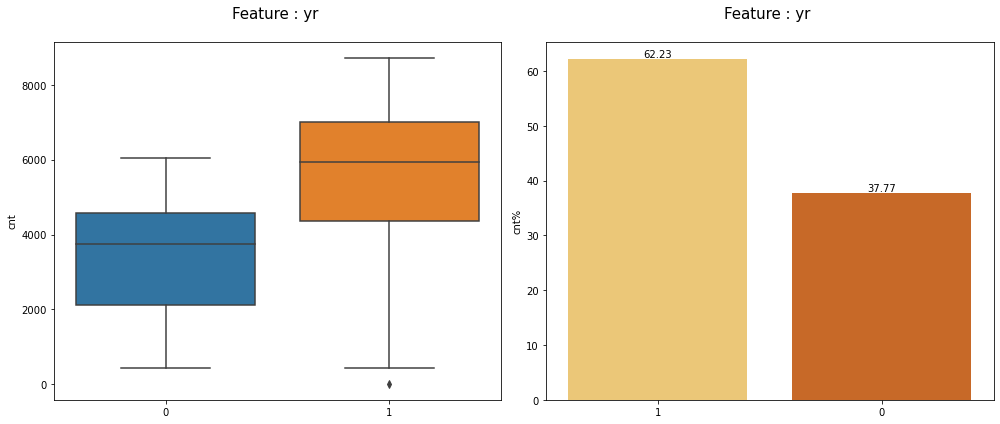

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


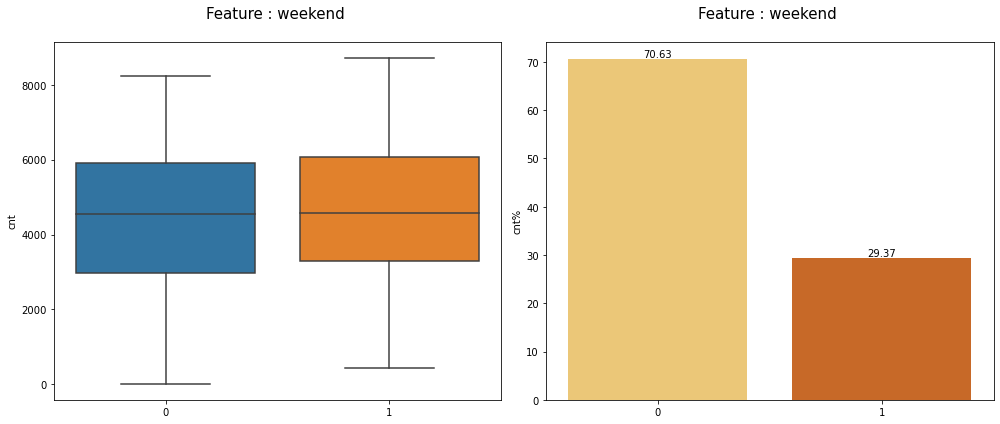

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


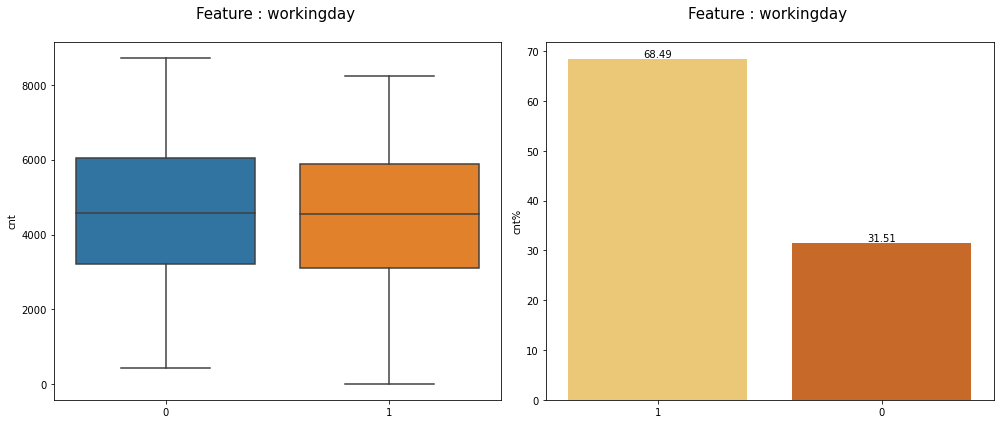

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


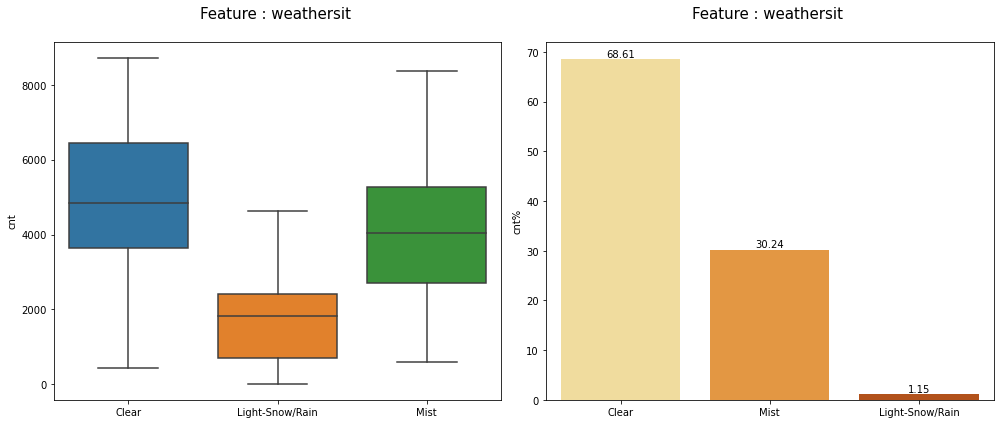

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


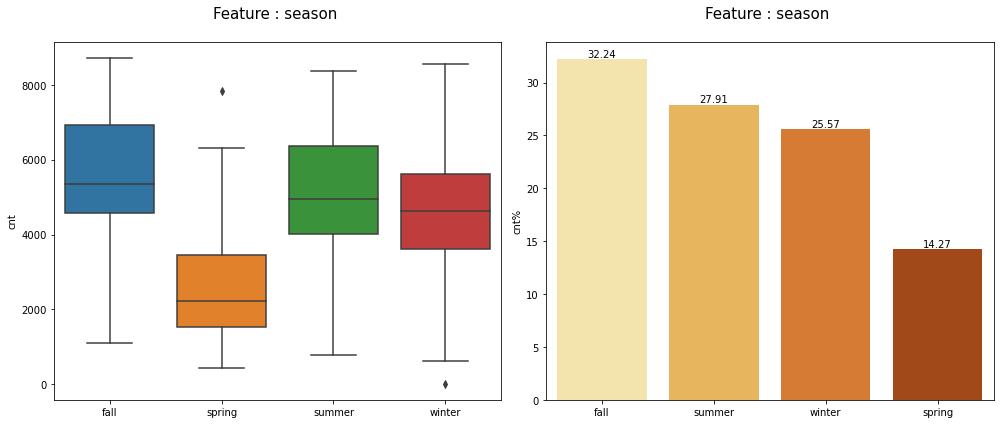

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


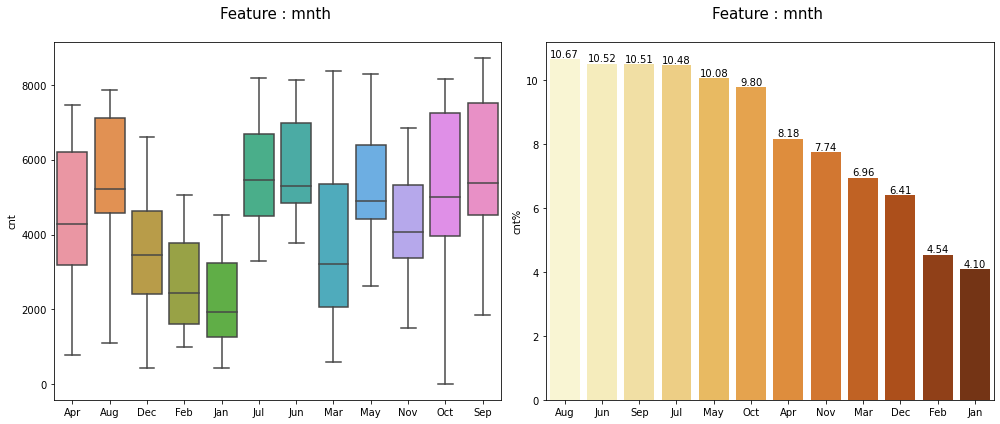

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


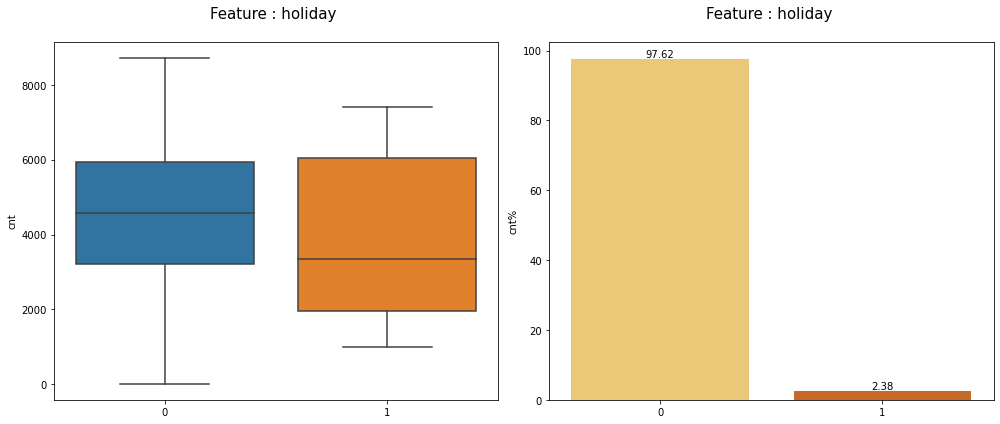

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


In [263]:
categ_cols =  ["yr",'weekend', 'workingday', 'weathersit', 'season', 'mnth', "holiday"]

multiple_box_bar_plot(data = bike, categ_cols = categ_cols, target_var = "cnt")

### Summary for all categorical columns
   
Insights from the bar-plot of the categorical features: 
1. `season` : In fall and summer season, the company has good demand for bikes. Spring season has the least demand.
2. `yr`: In 2018, the bike docking compnay has more demand as comapred to 2019.
3. `mnth`: From May to October, demand of bike is high as compared to other months.
4. `weathersit`: Apparently, if the weather is clear, demand is high for bikes.
5. `weekday` and `workingday` : Weekday and weekend has almost same demand.   
6. `holiday`: If there will be a holiday, then demand is less. 

**Insights from the bar-plot of the categorical features:**
1. `Spring`, `winter` and `year 2019` has some outliers.
    

### Flooring and caping the outliers if outside 3 standard deviation

##### season : winter

In [264]:
aa = np.percentile(bike["cnt"][bike["season"] == "winter"],99.7)
aa
### Even though, There is a point outside the box plot, but it is within 3 std. Ntg to worried.

8343.130999999998

In [265]:
bike["cnt"][bike["season"] == "winter"][bike["cnt"][bike["season"] == "winter"]>aa]

636    8555
Name: cnt, dtype: int64

In [266]:
bike["cnt"].iloc[636]

8555

In [267]:
bike["cnt"].iloc[636] = aa

In [268]:
bike["cnt"].iloc[636]

8343.130999999998

##### season : spring

In [269]:
aa = np.percentile(bike["cnt"][bike["season"] == "spring"],99.7)
aa

7017.611999999991

In [270]:
bike["cnt"][bike["season"] == "spring"][bike["cnt"][bike["season"] == "spring"]>aa]

440   7836.000000
Name: cnt, dtype: float64

In [271]:
bike["cnt"].iloc[440] = aa

In [272]:
bike["cnt"].iloc[440] 

7017.611999999991

##### yr = 2019

In [273]:
aa = np.percentile( bike["cnt"][bike["yr"] == 1], 0.3)
aa

485.06800000000004

In [274]:
bike["cnt"][bike["yr"] == 1][bike["cnt"][bike["yr"] == 1]<aa] 

666    22.000000
724   441.000000
Name: cnt, dtype: float64

In [275]:
bike["cnt"].iloc[[666,724]] = aa

In [276]:
bike["cnt"].iloc[[666,724]] 

666   485.068000
724   485.068000
Name: cnt, dtype: float64

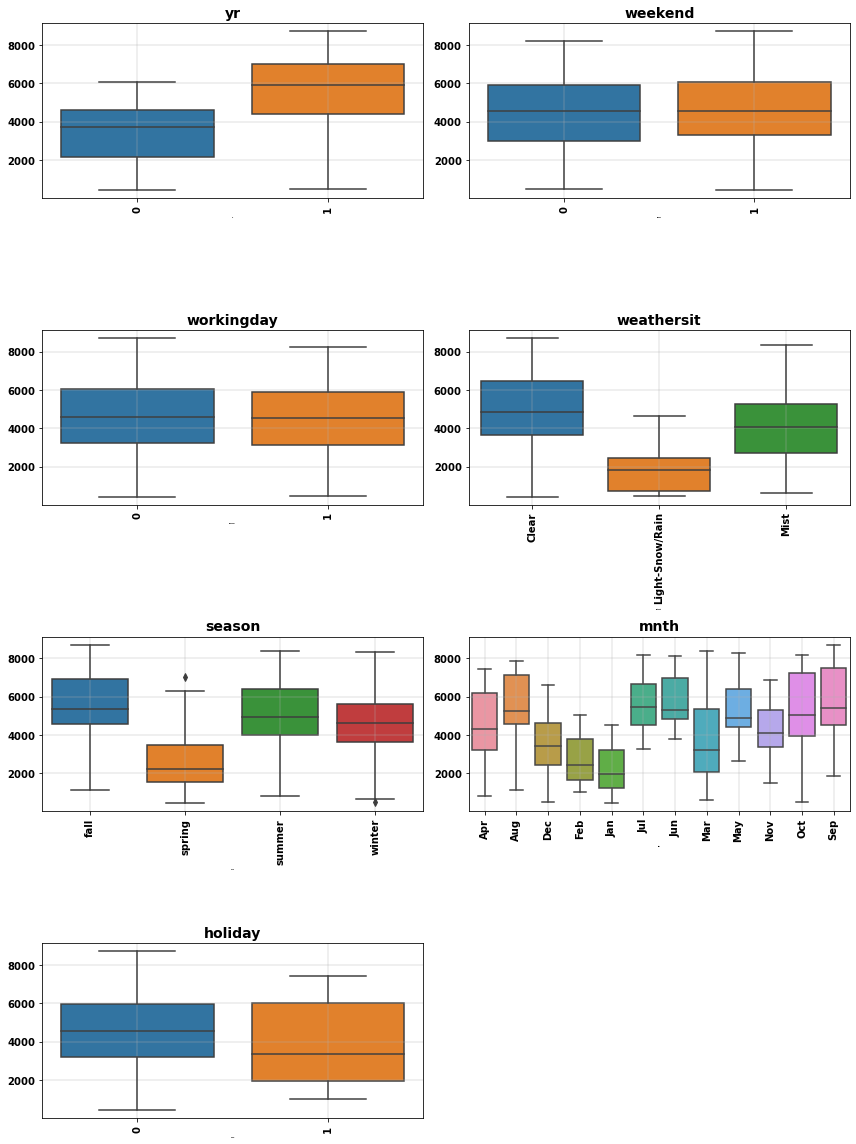

In [277]:
categ = ["yr",'weekend', 'workingday', 'weathersit', 'season', 'mnth', "holiday"]
box_plot_multiple_categ(df = bike,
                        column_lst = categ, 
                        hue = "cnt",
                        n_rows = 4, n_cols = 2,
                        fig_size = (12,16),
                        x_tick_rotation = 90
                        )

### Only true outlier are there now

### Numerical Columns

In [278]:
num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

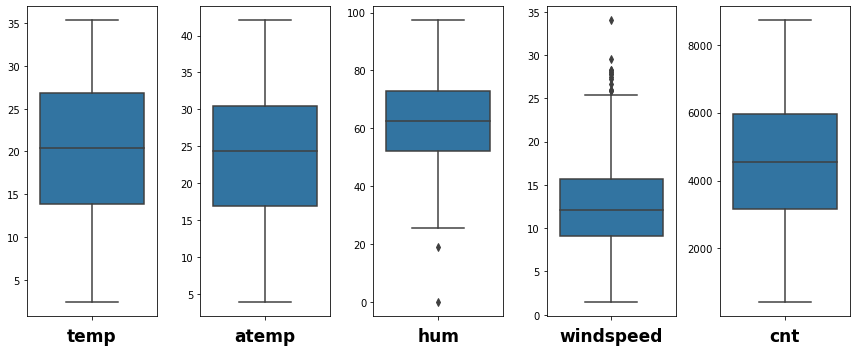

In [279]:
box_plot_multiple_continous(df = bike, column_lst = num_vars,n_rows = 1, n_cols=5, x_label_size =17,fig_size = (12,5))

### There are some outliers in humididty and windspeed.

In [280]:
bike[["hum", "windspeed"]].describe()

,hum,windspeed
count,730.000000,730.000000
mean,62.765175,12.763620
std,14.237589,5.195841
min,0.000000,1.500244
25%,52.000000,9.041650
50%,62.625000,12.125325
75%,72.989575,15.625589
max,97.250000,34.000021


### Flooring and caping the outliers with in 3 standard deviation

###### windspeed

In [281]:
aa = np.percentile(bike.windspeed,99.7)
aa

28.284494143

In [282]:
bike.windspeed[bike.windspeed > aa] 

49    34.000021
292   28.292425
431   29.584721
Name: windspeed, dtype: float64

In [283]:
bike.windspeed.iloc[[49,292,431]] = aa

In [284]:
bike.windspeed[bike.windspeed > np.percentile(bike.windspeed,99.7)] 

49    28.284494
292   28.284494
431   28.284494
Name: windspeed, dtype: float64

###### hum

In [285]:
aa = np.percentile(bike.hum,0.3)
aa

25.821854199999997

In [286]:
bike.hum[bike.hum < aa] 

49    18.791700
68     0.000000
461   25.416700
Name: hum, dtype: float64

In [287]:
bike.hum.iloc[[49,68,461]]

49    18.791700
68     0.000000
461   25.416700
Name: hum, dtype: float64

In [288]:
bike.hum.iloc[[49,68,461]] = aa

In [289]:
bike.hum.iloc[[49,68,461]]

49    25.821854
68    25.821854
461   25.821854
Name: hum, dtype: float64

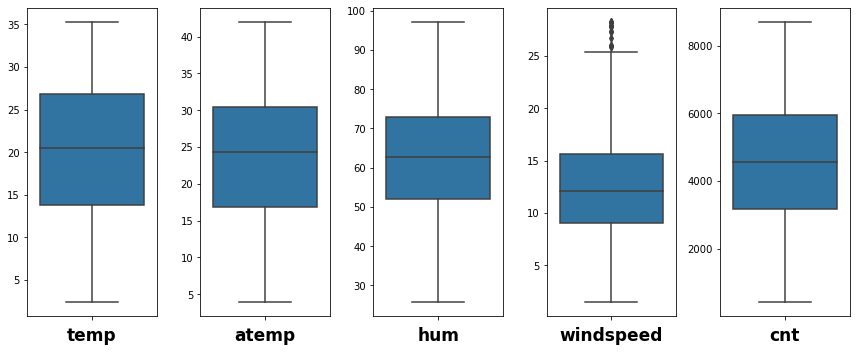

In [290]:
box_plot_multiple_continous(df = bike, column_lst = num_vars,n_rows = 1, n_cols=5, x_label_size =17,fig_size = (12,5))

### Only true outliers are there

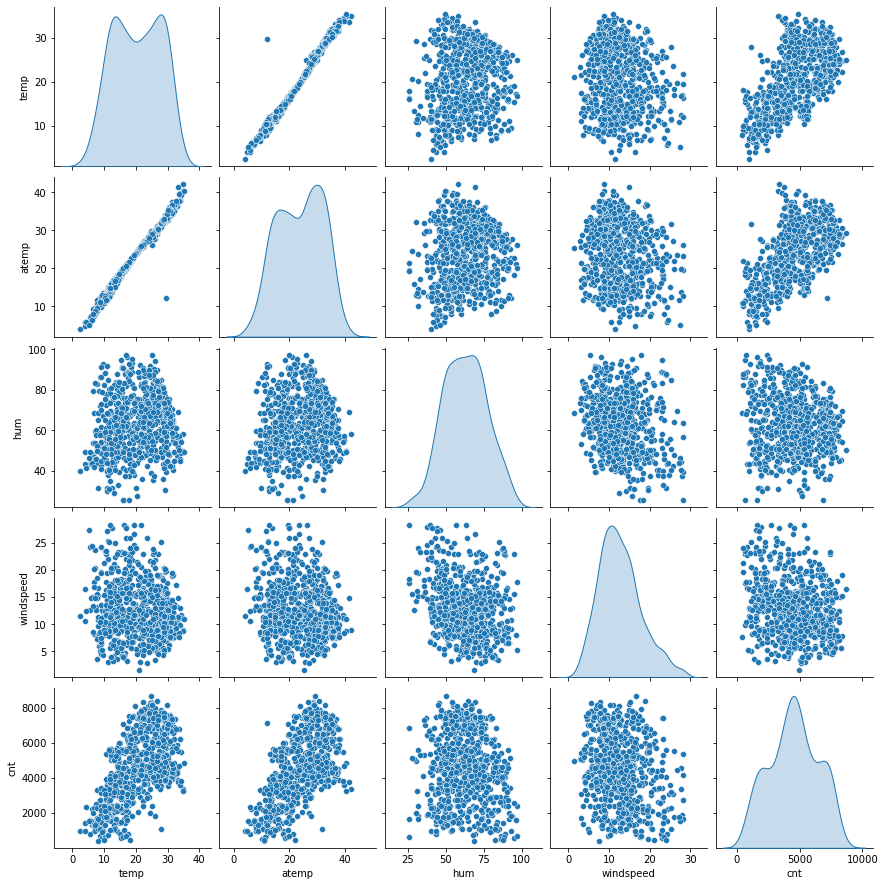

In [291]:
sns.pairplot(bike[num_vars], diag_kind = "kde" )
plt.show()

**Insights**
- atemp and temp are highly positivly correlated.
- Demand/cnt also shares the good poitive relation with atemp and temp.
- windspeed and hue are less negatively correlated.
- as temp increases humidity increases and windspeed decreases but low relation

# Preparing the Data for Modelling

# Encoding

### We have to create dummy variables for these three variables.


- season
- mnth
- weathersit

In [294]:
season_dummies = pd.get_dummies(bike["season"], drop_first  = True)
mnth_dummies = pd.get_dummies(bike["mnth"], drop_first  = True)
weathersit_dummies = pd.get_dummies(bike["weathersit"], drop_first  = True)

In [296]:
print("season_dummies.shape = ", season_dummies.shape)
print("mnth_dummies.shape = ", mnth_dummies.shape)
print("weathersit_dummies.shape = ", weathersit_dummies.shape)

season_dummies.shape =  (730, 3)
mnth_dummies.shape =  (730, 11)
weathersit_dummies.shape =  (730, 2)


In [297]:
new_bike = pd.concat([bike, season_dummies, mnth_dummies, weathersit_dummies], axis = 1)
new_bike.head()

,temp,atemp,hum,windspeed,cnt,yr,holiday,weekend,workingday,weathersit,season,mnth,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light-Snow/Rain,Mist
0,14.110847,18.181250,80.583300,10.749882,985.000000,0,0,0,1,Mist,spring,Jan,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,14.902598,17.686950,69.608700,16.652113,801.000000,0,0,0,1,Mist,spring,Jan,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,8.050924,9.470250,43.727300,16.636703,1349.000000,0,0,0,1,Clear,spring,Jan,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,8.200000,10.606100,59.043500,10.739832,1562.000000,0,0,0,1,Clear,spring,Jan,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,9.305237,11.463500,43.695700,12.522300,1600.000000,0,0,0,1,Clear,spring,Jan,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### lets drop the variables 
- season
- mnth
- weathersit

In [298]:
new_bike.drop(["season", "mnth", "weathersit"], inplace = True, axis = 1)

In [299]:
new_bike.shape

(730, 25)

In [300]:
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   temp             730 non-null    float64 
 1   atemp            730 non-null    float64 
 2   hum              730 non-null    float64 
 3   windspeed        730 non-null    float64 
 4   cnt              730 non-null    float64 
 5   yr               730 non-null    category
 6   holiday          730 non-null    category
 7   weekend          730 non-null    category
 8   workingday       730 non-null    category
 9   spring           730 non-null    uint8   
 10  summer           730 non-null    uint8   
 11  winter           730 non-null    uint8   
 12  Aug              730 non-null    uint8   
 13  Dec              730 non-null    uint8   
 14  Feb              730 non-null    uint8   
 15  Jan              730 non-null    uint8   
 16  Jul              730 non-null    uint8   
 1

In [655]:
# converting category in unit8

In [301]:
categ_cols = ["yr", "weekend","workingday", "holiday"]

for col in categ_cols:
    new_bike[col] = new_bike[col].astype('uint8')
    
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp             730 non-null    float64
 1   atemp            730 non-null    float64
 2   hum              730 non-null    float64
 3   windspeed        730 non-null    float64
 4   cnt              730 non-null    float64
 5   yr               730 non-null    uint8  
 6   holiday          730 non-null    uint8  
 7   weekend          730 non-null    uint8  
 8   workingday       730 non-null    uint8  
 9   spring           730 non-null    uint8  
 10  summer           730 non-null    uint8  
 11  winter           730 non-null    uint8  
 12  Aug              730 non-null    uint8  
 13  Dec              730 non-null    uint8  
 14  Feb              730 non-null    uint8  
 15  Jan              730 non-null    uint8  
 16  Jul              730 non-null    uint8  
 17  Jun             

In [625]:
aa= pd.DataFrame(new_bike.corr().unstack().reset_index())
aa = aa[ (aa.level_0 == "cnt") & (aa.level_1 != "cnt")].sort_values(by = 0, ascending =  False)
bb = pd.concat([aa[aa[0] > 0.5], aa[aa[0] < -0.5]], axis = 0)
bb.columns = ["Target_var", "Respone_var", "corr"]
bb

,Target_var,Respone_var,corr
101,cnt,atemp,0.631649
100,cnt,temp,0.628040
105,cnt,yr,0.570481
109,cnt,spring,-0.563872


**Let's import some important libraries that would be required for:**
- Checking Multicollinearity
- Rescaling the featuures 
- For train test data split
- Feature Selection: Auto - RFE
- Linear regression model
- Evaluation Metrices

In [302]:
# Train test split
from sklearn.model_selection import train_test_split 

# preprocessing of data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Selecting features using RFE
from sklearn.feature_selection import RFE

# summary based linear regression
import statsmodels.api as sm
import math

# Linear regression model
from sklearn.linear_model import LinearRegression

# Regression metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# cross validation score
from sklearn.model_selection import cross_val_score

# for checking multicollienearity
from statsmodels.stats.outliers_influence import variance_inflation_factor


### We will follow two optimization techniques for builing models:

 
       - statsmodels.api
       - Gradient Descent





<div class="alert alert-danger" style = color:#000080>
    <span style='font-family:Georgia' >
        <h1> ORDINARY LEAST SQUARE </h1>
     </span>
</div>

#### Let's split the data set

In [591]:
df_train, df_test = train_test_split(new_bike,  train_size = 0.7, test_size = 0.3, random_state =100)

In [304]:
print(df_train.shape)
print(df_test.shape)

(510, 25)
(219, 25)


In [305]:
df_train.head()

,temp,atemp,hum,windspeed,cnt,yr,holiday,weekend,workingday,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light-Snow/Rain,Mist
653,19.201653,23.042300,55.833300,12.208807,7534.000000,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
576,29.246653,33.144800,70.416700,11.083475,7216.000000,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
426,16.980847,20.674600,62.125000,10.792293,4066.000000,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
728,10.489153,11.585000,48.333300,23.500518,1796.000000,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
482,15.443347,18.875200,48.958300,8.708325,4220.000000,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Data Transformation

#### MinMaxScaler: Only on  numerical independent varaible

In [306]:
scaler = MinMaxScaler()


num_vars = ["temp","atemp","hum", "windspeed", "cnt"]
Train_scaler = scaler.fit(df_train[num_vars])

df_train[num_vars] = Train_scaler.transform(df_train[num_vars])
df_test[num_vars] = Train_scaler.transform(df_test[num_vars])

In [307]:
df_train.head()

,temp,atemp,hum,windspeed,cnt,yr,holiday,weekend,workingday,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light-Snow/Rain,Mist
653,0.509887,0.501133,0.421392,0.368345,0.857540,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
576,0.815169,0.766351,0.626158,0.324128,0.819148,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
426,0.442393,0.438975,0.509734,0.312687,0.438851,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
728,0.245101,0.200348,0.316084,0.812025,0.164795,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
482,0.395666,0.391735,0.324860,0.230802,0.457443,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [308]:
df_test.head()

,temp,atemp,hum,windspeed,cnt,yr,holiday,weekend,workingday,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light-Snow/Rain,Mist
184,0.831783,0.769660,0.533136,0.103132,0.677532,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
535,0.901354,0.842587,0.468780,0.188252,0.697815,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
299,0.511964,0.496145,0.778854,0.409261,0.268985,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
221,0.881625,0.795343,0.233009,0.415829,0.525051,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
152,0.817246,0.741471,0.065686,0.658105,0.547748,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Lets Split the data set 

In [309]:
X_train = df_train.drop(["cnt",] ,axis =1)
y_train = df_train["cnt"]

X_test  = df_test.drop(["cnt"],axis =1)
y_test  = df_test["cnt"]

In [310]:
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape (510, 24)
y_train shape (510,)
X_test shape (219, 24)
y_test shape (219,)


### Let's check multicollinearity before modeling

In [311]:
def vif(X_train):    
    vif_df = pd.DataFrame()
    vif_df["column_name"] = X_train.columns
    vif_df["vif_values"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df.sort_values(by = "vif_values", ascending = False, inplace  = True)
    vif_df.reset_index( drop=True, inplace= True)
    return vif_df

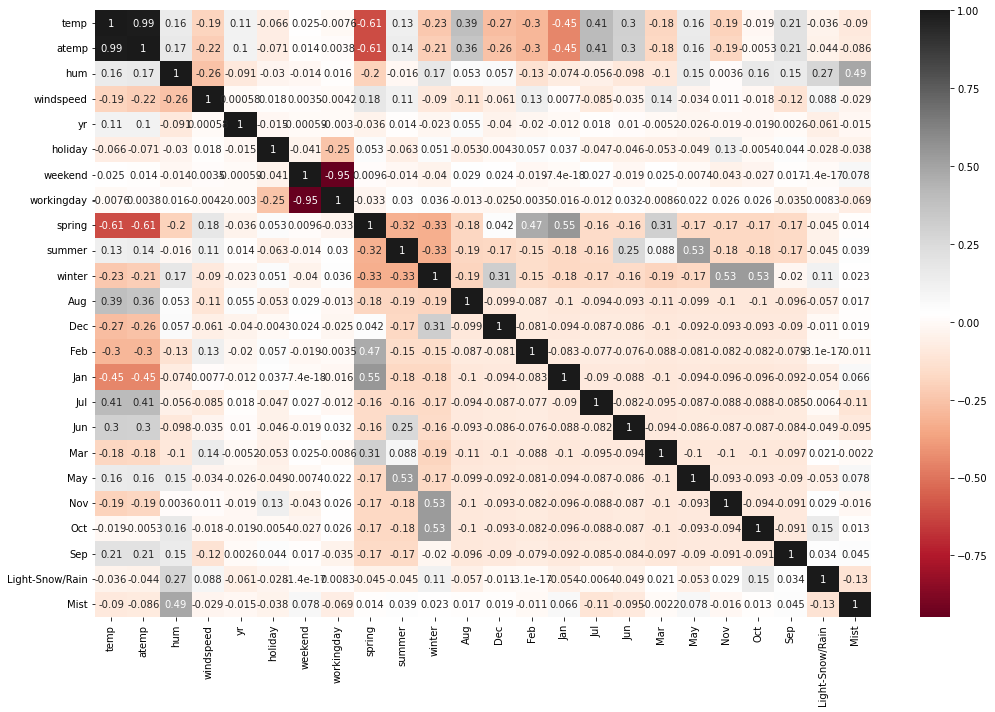

In [312]:
heatmap_corr(X_train)

- Given plot shows that there is high correlation in workingday and weekend
- temp laso shows some correclation with fall_jul and spring_jan
- humididty also has some corelation with mist and ligh-snow/rain

In [314]:
vif(X_train)

,column_name,vif_values
0,temp,439.334951
1,atemp,381.319919
2,workingday,56.887538
3,weekend,21.460261
4,hum,17.356925
5,spring,13.415895
6,winter,12.450608
7,summer,9.663266
8,Nov,7.094472
9,Aug,6.908463


- Clearly tere are some variables having high multicollinearity

**Let's use Auto method of selecting best variables with least vif and significant variables.**<br>
**With Those features we will start building model and then we will add and remove variables to get the best model**


In [323]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=14)
rfe = rfe.fit(X_train, y_train)

In [324]:
X_train.columns[~rfe.support_]

Index(['weekend', 'workingday', 'summer', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar',
       'May', 'Oct'],
      dtype='object')

In [325]:
X_train.columns[rfe.support_]

Index(['temp', 'atemp', 'hum', 'windspeed', 'yr', 'holiday', 'spring',
       'winter', 'Jan', 'Jul', 'Nov', 'Sep', 'Light-Snow/Rain', 'Mist'],
      dtype='object')

In [326]:
vif(X_train[X_train.columns[rfe.support_]])

,column_name,vif_values
0,temp,351.453513
1,atemp,350.223924
2,hum,13.859698
3,windspeed,4.180080
4,spring,2.569345
5,Mist,2.420077
6,winter,2.390069
7,yr,2.078904
8,Jan,1.635205
9,Nov,1.586441


### Defining important functions that would be required continuously

In [327]:
def linear_reg_summary(X_train, y_train, X_test, y_test):
    X_train_lm = sm.add_constant(X_train)
    glm = sm.OLS(y_train, X_train_lm).fit()
    
    # train score
    y_train_pred = glm.predict(X_train_lm)
    train_error  = y_train_pred - y_train 
    r2_train     = r2_score(y_train,y_train_pred)
    adj_r2_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    train_rmse = math.sqrt(mean_squared_error(y_train,y_train_pred))
    train_mae = mean_absolute_error(y_train,y_train_pred)
    
    
    print("Train R-Squared : ", round(r2_train,3))
    print("Train Adjusted R-Squared : ", round(adj_r2_train,3))
    print('Train Root mean square error :',train_rmse)
    print('Train absolute error :', train_mae)
    
    
    # test score
    X_test_lm   = sm.add_constant(X_test)
    y_test_pred = glm.predict(X_test_lm)
    test_error  = y_test_pred - y_test
    r2_test     = r2_score(y_test,y_test_pred)
    adj_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    test_rmse = math.sqrt(mean_squared_error(y_test,y_test_pred))
    test_mae = mean_absolute_error(y_test,y_test_pred)
    print()
    print("Test R-Squared : ", round(r2_test,3))
    print("Test Adjusted R-Squared : ", round(adj_r2_test,3))
    print('Train Root mean square error :',test_rmse)
    print('Train absolute error :', test_mae)
    
    

In [328]:
def linear_reg(X_train, y_train, X_test, y_test):
    X_train_lm = sm.add_constant(X_train)
    glm = sm.OLS(y_train, X_train_lm).fit()
    print(glm.summary())
    
    # train score
    y_train_pred = glm.predict(X_train_lm)
    train_error  = y_train_pred - y_train 
    r2_train     = r2_score(y_train,y_train_pred)
    adj_r2_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    train_rmse = math.sqrt(mean_squared_error(y_train,y_train_pred))
    train_mae = mean_absolute_error(y_train,y_train_pred)
    
    
    print("Train R-Squared : ", round(r2_train,3))
    print("Train Adjusted R-Squared : ", round(adj_r2_train,3))
    print('Train Root mean square error :',train_rmse)
    print('Train absolute error :', train_mae)
    
    
    # test score
    X_test_lm   = sm.add_constant(X_test)
    y_test_pred = glm.predict(X_test_lm)
    test_error  = y_test_pred - y_test
    r2_test     = r2_score(y_test,y_test_pred)
    adj_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    test_rmse = math.sqrt(mean_squared_error(y_test,y_test_pred))
    test_mae = mean_absolute_error(y_test,y_test_pred)
    print()
    print("Test R-Squared : ", round(r2_test,3))
    print("Test Adjusted R-Squared : ", round(adj_r2_test,3))
    print('Train Root mean square error :',test_rmse)
    print('Train absolute error :', test_mae)
    
    return glm, train_error, test_error
    


# Model 1.1

In [329]:
X_train11 = X_train[X_train.columns[rfe.support_]]
X_test11 = X_test[X_test.columns[rfe.support_]]
print(X_train11.shape)
print(X_test11.shape)

(510, 14)
(219, 14)


In [330]:
glm11, train_error11, test_error11 = linear_reg(X_train11, y_train, X_test11, y_test)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.30e-189
Time:                        14:20:39   Log-Likelihood:                 489.74
No. Observations:                 510   AIC:                            -949.5
Df Residuals:                     495   BIC:                            -886.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2777      0.027     

<div class="alert alert-info">
    <span style='font-family:Georgia' >
       <h3>Insights:</h3><br>
        <li><b>P values of atemp is less than 0.5. Let's drop it.</b></li> 
        <li><b>Moreover, there is big gap between train and test adjsusted r square.</b></li> 
      </span>    
</div>



#### Drop "atemp" from x train because of high multicollinearity in it.

### Model 1.2

In [331]:
X_train12 = X_train11.drop(["atemp"], axis = 1)
X_test12 = X_test11.drop(["atemp"], axis = 1)

print(X_train12.shape)
print(X_test12.shape)

(510, 13)
(219, 13)


In [332]:
glm12, train_error12, test_error12 = linear_reg(X_train12, y_train, X_test12, y_test)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.8
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.17e-190
Time:                        14:21:09   Log-Likelihood:                 489.46
No. Observations:                 510   AIC:                            -950.9
Df Residuals:                     496   BIC:                            -891.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2800      0.027     

In [333]:
vif(X_train12)

,column_name,vif_values
0,hum,13.627573
1,temp,11.454678
2,windspeed,4.108505
3,spring,2.558359
4,Mist,2.413834
5,winter,2.352839
6,yr,2.078705
7,Jan,1.633383
8,Nov,1.586417
9,Jul,1.397831


- **In Model 1.2, p value for "Nov' is insignificant. Drop it.**

### Model 1.3

In [334]:
X_train13 = X_train12.drop(["Nov"], axis = 1)
X_test13 = X_test12.drop(["Nov"], axis = 1)

print(X_train13.shape)
print(X_test13.shape)

(510, 12)
(219, 12)


In [335]:
glm13, train_error13, test_error13 = linear_reg(X_train13, y_train, X_test13, y_test)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.6
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          4.28e-191
Time:                        14:26:10   Log-Likelihood:                 487.68
No. Observations:                 510   AIC:                            -949.4
Df Residuals:                     497   BIC:                            -894.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2745      0.027     

In [336]:
vif(X_train13)

,column_name,vif_values
0,hum,13.627569
1,temp,11.430703
2,windspeed,4.067217
3,spring,2.552304
4,Mist,2.413309
5,yr,2.078453
6,winter,1.832323
7,Jan,1.633383
8,Jul,1.397391
9,Light-Snow/Rain,1.296800


- All variables are significant.
- Though there is a difference bw the r2 of train and r2 of test.
- Though hum has high vif value. Drop it.

### Model 1.4

In [337]:
X_train14 = X_train13.drop(["hum"], axis = 1)
X_test14 = X_test13.drop(["hum"], axis = 1)

print(X_train14.shape)
print(X_test14.shape)

(510, 11)
(219, 11)


In [338]:
glm14, train_error14, test_error14 = linear_reg(X_train14, y_train, X_test14, y_test)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.02e-188
Time:                        14:28:21   Log-Likelihood:                 479.21
No. Observations:                 510   AIC:                            -934.4
Df Residuals:                     498   BIC:                            -883.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2310      0.025     

In [339]:
vif(X_train14)

,column_name,vif_values
0,temp,4.639460
1,windspeed,4.031015
2,spring,2.241696
3,yr,2.064183
4,Jan,1.601174
5,Mist,1.528986
6,winter,1.396914
7,Jul,1.356650
8,Sep,1.202115
9,Light-Snow/Rain,1.081601


In [341]:
#R-squared scores
r2_scores = cross_val_score(lm, np.array(X_train14), np.array(y_train), cv=6)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.8236219244667494


<h3> Model looks good, Vif values are less than 5 and p-values for every coefficeint is less than 0.5.</h3>
<h3>Let's check is the assumption getting followed.</h3>

<div class="alert alert-warning" style = color:#000080>
    <span style='font-family:Georgia' >
        <b>Assumption 1: No Multicliinearity between Independent Variables</b></span>    
</div>

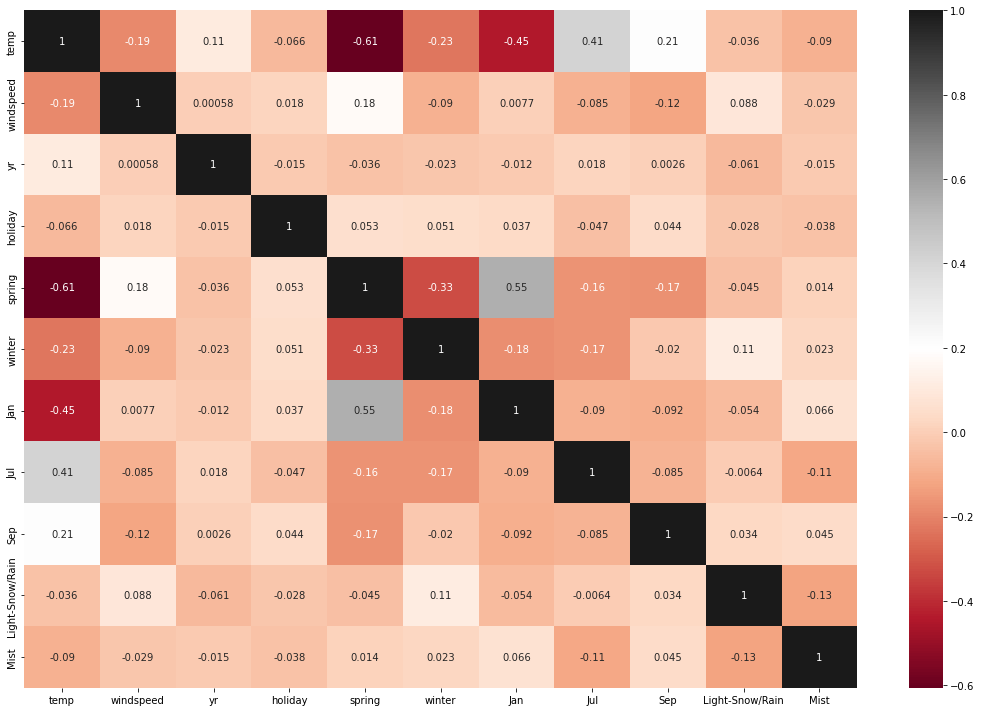

In [345]:
heatmap_corr(X_train14)

<h3>Heat map shows there is some multicollinearity.</h3>

1. `temp` has correlation with `july`, `january`, `spring`.
2. `spring` has correlation with `january` and `winter`.

**This suggests we have to filter our model more in order to remove this multicollinearity.**

# Residual Analysis

<div class="alert alert-warning" style = color:#000080>
    <span style='font-family:Georgia' >
        <b>Assumption 2: Error should be normally distributed</b></span>    
</div>

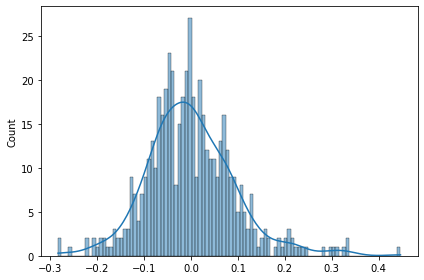

In [378]:
# train errro
sns.histplot(train_error14, kde = True, bins =100)
plt.show()

- train errors looks normally distributed
- However, there are some high peaks in center and right tail is little stretched
- Let's plot the qq- plot and see the exact diff.

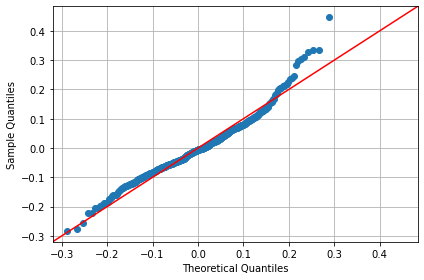

In [379]:
sm.qqplot(train_error14, line ='45', scale = 0.1)
plt.grid()
plt.show()

### Almost Normal, Though there is litle bit of S-shape which represents that errors distribution is much in center
- There can be Multicollinearity 
- Both train and test error are not normally distributed, there is a need of more improvement in a model.

<div class="alert alert-warning" style = color:#000080>
    <span style='font-family:Georgia' >
        <b>Assumption 3: No correlation among the error terms</b></span>    
</div>


## Residual vs Row number Plot : will help in checking the seasonality


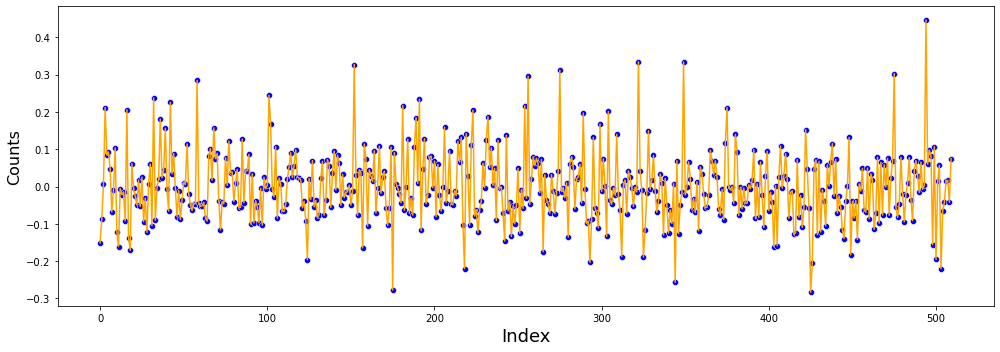

In [380]:
X_train14_lm = sm.add_constant(X_train14)
train_pred14 = glm14.predict(X_train14_lm)

c = [i for i in range(0,len(X_train14),1)]

plt.figure(figsize=(14,5))

sns.lineplot(x = c, y= train_error14, color = "orange" )
sns.scatterplot(x = c, y= train_error14, color = "blue" )
  
plt.xlabel('Index', fontsize=18)                                 
plt.ylabel('Counts', fontsize=16)                                

plt.show()

-  No autocorrelation.

<div class="alert alert-warning" style = color:#000080>
    <span style='font-family:Georgia' >
        <b>Assumption 4: Homoscedasticity of the errors</b></span>    
</div>

# Residual vs Fitted Value plot

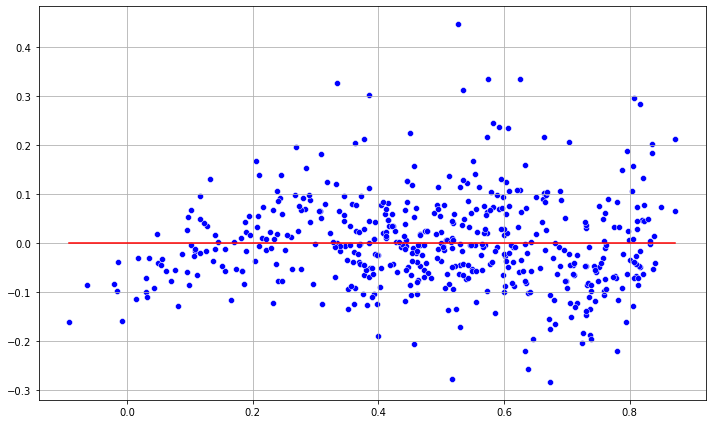

In [382]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = train_pred14,  y= train_error14, color = "blue" )
sns.lineplot(y=np.mean(train_error14), x=train_pred14, color = "Red")
plt.grid()
plt.show()

- Residuals are spread all over the plot, there is no specific pattern as such.
- There are also some errors, which are far deviated. 
- Though they are somewhere close and it is because of multicollineariy.
- Almost constant varaince is there but not constant varaince. Homoscedacity is there.
- Hence, we can consider it to have linearity but it can be improved.

## Actual vs predicted curve

#### Train Data

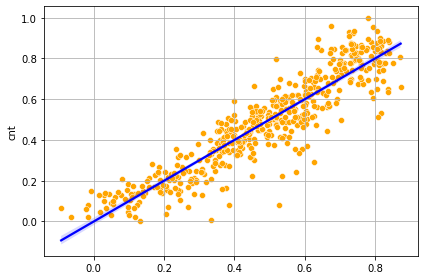

In [383]:
sns.scatterplot(train_pred14, y_train, color = "orange", )
sns.regplot(train_pred14, y_train, scatter = False, color = "blue")
plt.grid()
plt.show()

- Let's try if we can reduce this multicollinearity

### Hit and trial method elimination on the basis of vif and corrlation we found above.

### Model 1.5

In [478]:
X_train15 = X_train14.drop([ "windspeed"], axis = 1)
X_test15 = X_test14.drop([ "windspeed"], axis = 1)

print(X_train15.shape)
print(X_test15.shape)


(510, 10)
(219, 10)


In [479]:
glm15, train_error15, test_error15 = linear_reg(X_train15, y_train, X_test15, y_test)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.1
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          8.76e-183
Time:                        15:28:16   Log-Likelihood:                 462.33
No. Observations:                 510   AIC:                            -902.7
Df Residuals:                     499   BIC:                            -856.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1630      0.023     

In [480]:
vif(X_train15)

,column_name,vif_values
0,temp,3.026916
1,yr,2.053594
2,spring,1.810462
3,Jan,1.599252
4,Mist,1.519785
5,Jul,1.337504
6,winter,1.333532
7,Sep,1.187734
8,Light-Snow/Rain,1.063877
9,holiday,1.042104


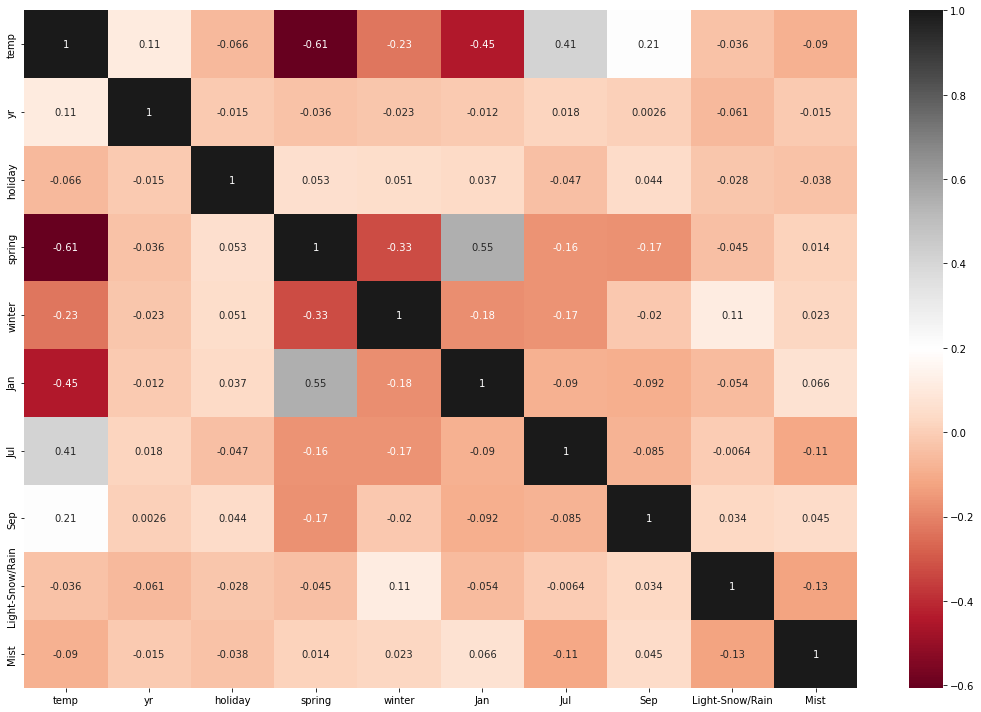

In [481]:
heatmap_corr(X_train15)

In [482]:
#R-squared scores
r2_scores = cross_val_score(lm, np.array(X_train15), np.array(y_train), cv=5)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.8147741228644705


#### Model 1.6  

In [483]:
X_train16 = X_train15.drop([ "Jan"], axis = 1)
X_test16 = X_test15.drop([ "Jan"], axis = 1)

print(X_train16.shape)
print(X_test16.shape)


(510, 9)
(219, 9)


In [484]:
glm16, train_error16, test_error16 = linear_reg(X_train16, y_train, X_test16, y_test)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     263.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.57e-183
Time:                        15:32:59   Log-Likelihood:                 461.20
No. Observations:                 510   AIC:                            -902.4
Df Residuals:                     500   BIC:                            -860.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1561      0.023     

In [507]:
vif(X_train16)

,column_name,vif_values
0,temp,2.986266
1,yr,2.047307
2,Mist,1.505978
3,Jul,1.334124
4,winter,1.333397
5,spring,1.248026
6,Sep,1.186998
7,Light-Snow/Rain,1.063525
8,holiday,1.041836


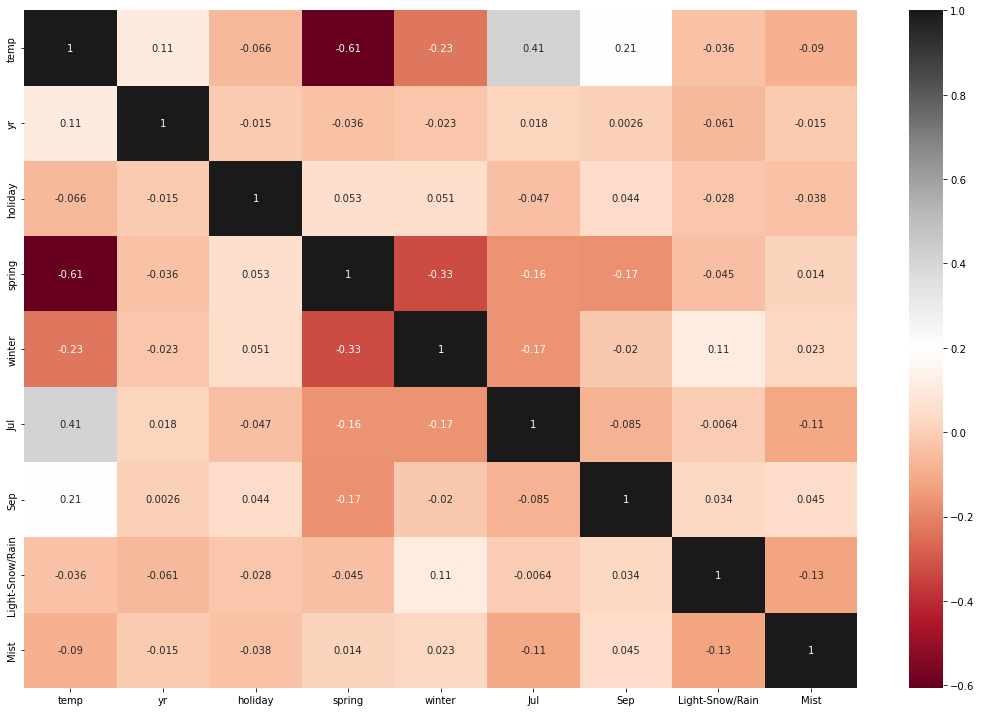

In [485]:
heatmap_corr(X_train16)

In [486]:
#R-squared scores
r2_scores = cross_val_score(lm, np.array(X_train16), np.array(y_train), cv=5)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.8136236333246251


In [487]:
# CV score is also fine, no major difference in modeld and vif has come down too.
# Lesser the variables, contannt variance would be there. 

#### Let's check the assumptions as well.

# Residual Analysis

<div class="alert alert-warning" style = color:#000080>
    <span style='font-family:Georgia' >
        <b>Assumption 1: Error should be normally distributed</b></span>    
</div>

# Train Error

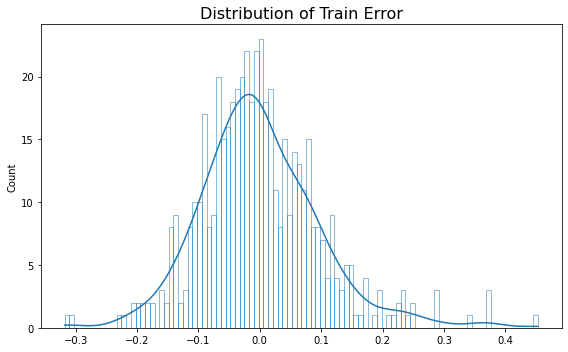

In [512]:
plt.figure(figsize = (8,5))
sns.histplot(train_error16, kde = True, bins =100, fill=False)
plt.title("Distribution of Train Error",  fontsize = 16)
plt.show()

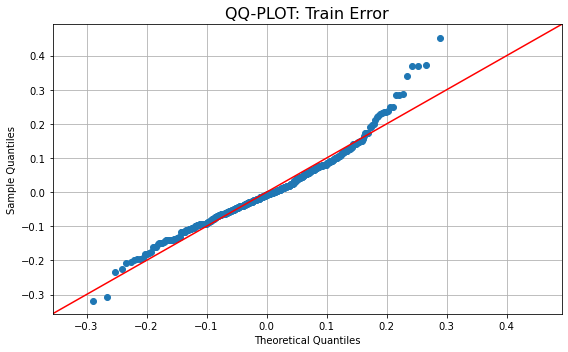

In [523]:
fig, ax = plt.subplots(figsize=(8, 5))
sm.qqplot(train_error16, line ='45', scale = 0.1, ax=ax)
plt.title("QQ-PLOT: Train Error", fontsize = 16)
plt.grid()
plt.show()

## Test Error

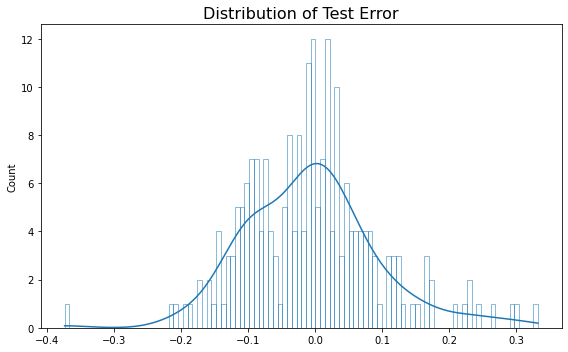

In [524]:
plt.figure(figsize = (8,5))
sns.histplot(test_error16, kde = True, bins =100, fill=False)
plt.title("Distribution of Test Error",  fontsize = 16)
plt.show()

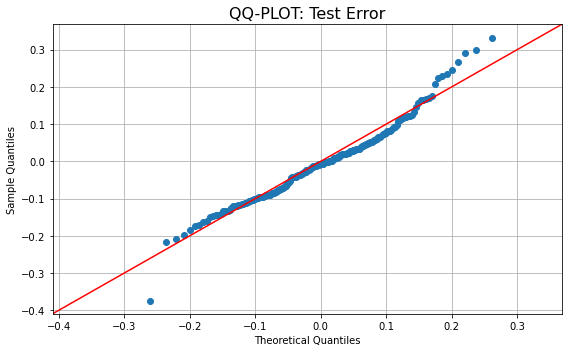

In [525]:
fig, ax = plt.subplots(figsize=(8, 5))
sm.qqplot(test_error16, line ='45', scale = 0.1, ax=ax)
plt.title("QQ-PLOT: Test Error", fontsize = 16)
plt.grid()
plt.show()

### Train and test error are almost normally distributed.

<div class="alert alert-warning" style = color:#000080>
    <span style='font-family:Georgia' >
        <b>Assumption 2: No correlation among the error terms</b></span>    
</div>


## Residual vs Row Number Plot : will help in checking the seasonality

### Train error

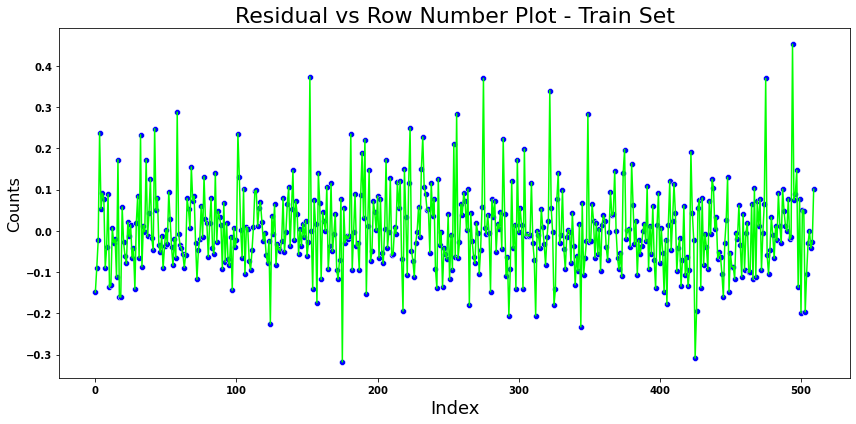

In [574]:
plt.figure(figsize=(12,6))

c = [i for i in range(0,len(X_train16),1)]
sns.lineplot(x = c, y= train_error16, color = "lime" )
sns.scatterplot(x = c, y= train_error16, color = "blue" )


plt.title("Residual vs Row Number Plot - Train Set",fontsize=22)  
plt.xlabel('Index', fontsize=18)                                 
plt.ylabel('Counts', fontsize=16)
plt.yticks(weight = "bold")
plt.xticks(weight = "bold")
plt.show()

### Test Error

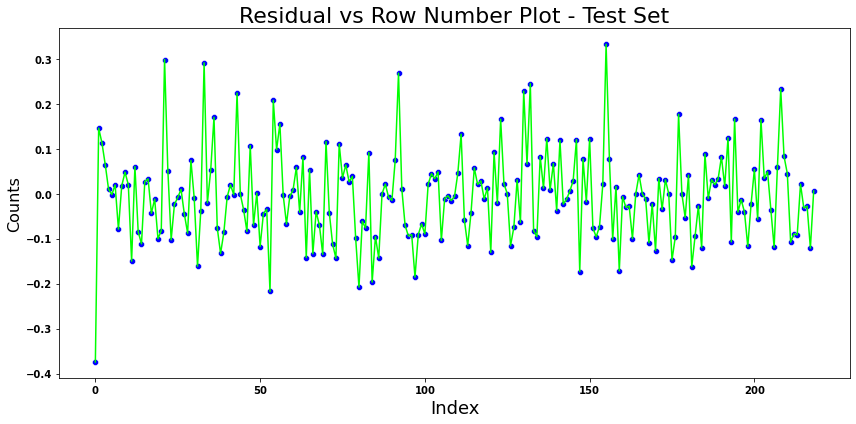

In [575]:


c = [i for i in range(0,len(X_test16),1)]

plt.figure(figsize=(12,6))

sns.lineplot(x = c, y= test_error16, color = "lime" )
sns.scatterplot(x = c, y= test_error16, color = "blue" )


plt.title("Residual vs Row Number Plot - Test Set",fontsize=22)  
plt.xlabel('Index', fontsize=18)                                 
plt.ylabel('Counts', fontsize=16)
plt.yticks(weight = "bold")
plt.xticks(weight = "bold")
plt.show()

**No Auto correlation in train and test residuals. No trend as such**

<div class="alert alert-warning" style = color:#000080>
    <span style='font-family:Georgia' >
        <b>Assumption 3: Homoscedasticity of the errors</b></span>    
</div>

### Residuals vs Prediction Plot

##### Train error

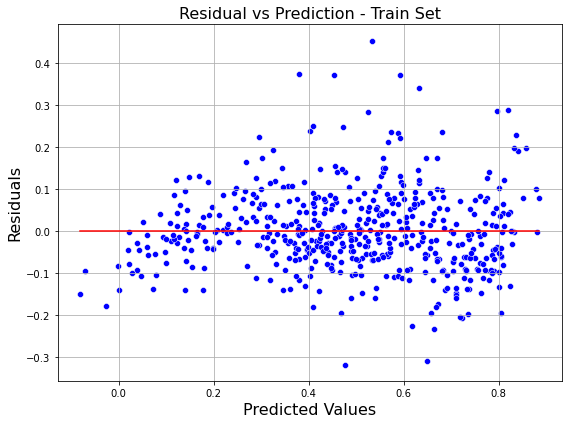

In [556]:
X_train16_lm = sm.add_constant(X_train16)
train_pred16 = glm16.predict(X_train16_lm)

plt.figure(figsize= (8,6))
sns.scatterplot(x = train_pred16,  y= train_error16, color = "blue" )
sns.lineplot(x=train_pred16, y=np.mean(train_error16), color = "Red")
plt.title("Residual vs Prediction - Train Set", fontsize = 16)
plt.ylabel("Residuals", fontsize = 16)
plt.xlabel("Predicted Values",fontsize = 16)
plt.grid()
plt.show()

##### Test error

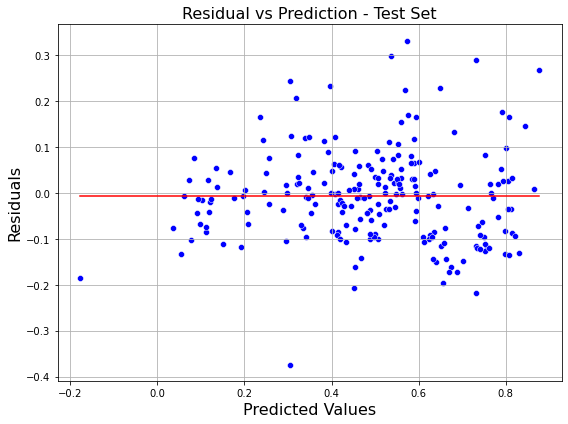

In [557]:
X_test16_lm = sm.add_constant(X_test16)
test_pred16 = glm16.predict(X_test16_lm)

plt.figure(figsize= (8,6))
sns.scatterplot(x = test_pred16,  y= test_error16, color = "blue" )
sns.lineplot(x=test_pred16, y=np.mean(test_error16), color = "Red")
plt.title("Residual vs Prediction - Test Set", fontsize = 16)
plt.ylabel("Residuals", fontsize = 16)
plt.xlabel("Predicted Values",fontsize = 16)
plt.grid()
plt.show()

**Both train and test data have:**
- **No homoscedacity**
- **Well Spread**
- **Constant Varaince**

## Actual vs predicted curve

### Train Error

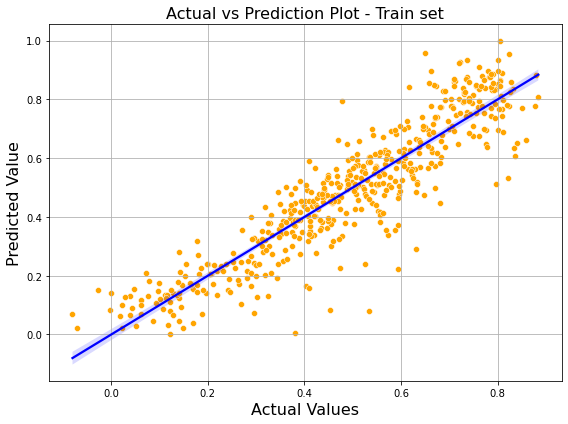

In [559]:
plt.figure(figsize= (8,6))
sns.scatterplot(train_pred16, y_train, color = "orange", )
sns.regplot(train_pred16, y_train, scatter = False, color = "blue")
plt.title("Actual vs Prediction Plot - Train set", fontsize = 16)
plt.ylabel("Predicted Value", fontsize = 16)
plt.xlabel("Actual Values",fontsize = 16)
plt.grid()
plt.show()

### Test Error

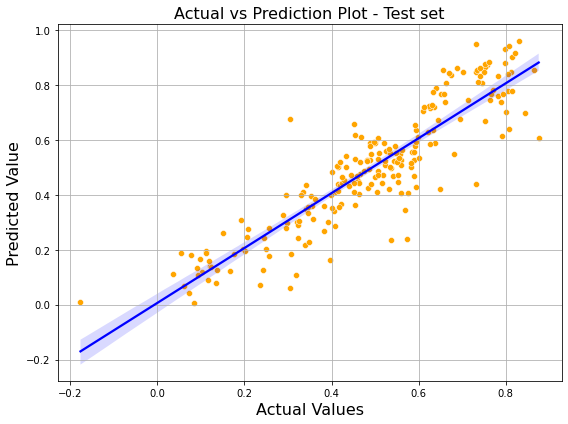

In [561]:
plt.figure(figsize= (8,6))
sns.scatterplot(test_pred16, y_test, color = "orange", )
sns.regplot(test_pred16, y_test, scatter = False, color = "blue")
plt.title("Actual vs Prediction Plot - Test set", fontsize = 16)
plt.ylabel("Predicted Value", fontsize = 16)
plt.xlabel("Actual Values",fontsize = 16)
plt.grid()
plt.show()

**For both training and test residuals:**
- **Are close to best fit line.**
- **Less Root mean squared error will be there.**

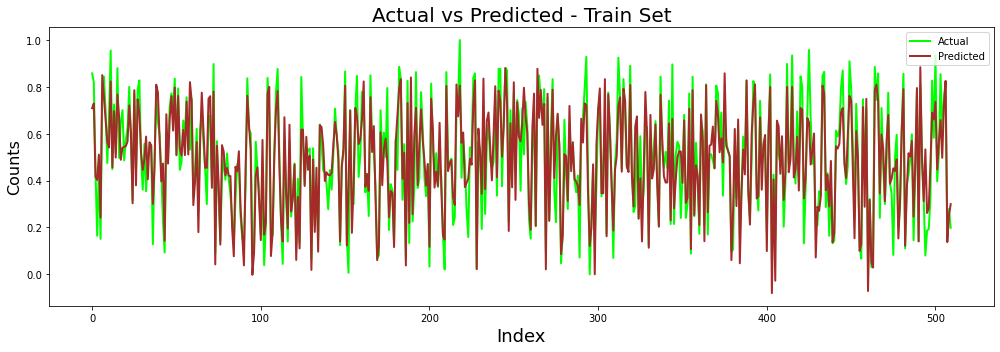

In [572]:
c = [i for i in range(0,len(X_train16),1)]

plt.figure(figsize=(14,5))

sns.lineplot(c,y_train, color="lime",linewidth=2.0, legend=True)
sns.lineplot(c,train_pred16, color="brown",linewidth=2.0, legend=True)

plt.title('Actual vs Predicted - Train Set', fontsize = 20)  
plt.xlabel('Index', fontsize=18)                                 
plt.ylabel('Counts', fontsize=16)   
plt.legend(["Actual", "Predicted"], loc = 'upper right')

plt.show()

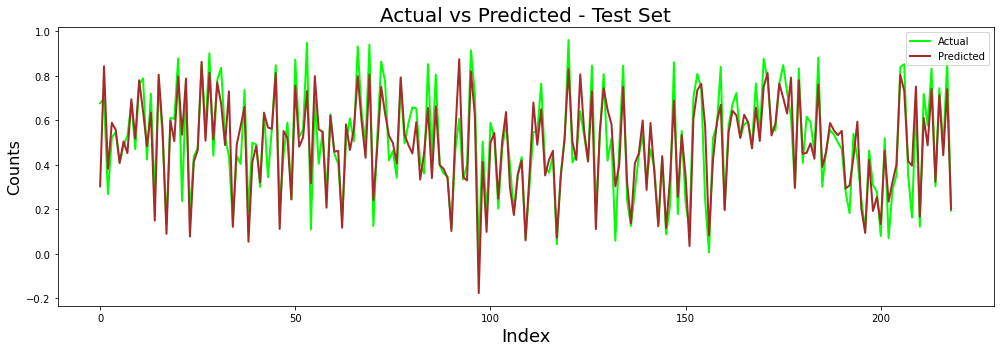

In [573]:
c = [i for i in range(0,len(X_test16),1)]

plt.figure(figsize=(14,5))

sns.lineplot(c,y_test, color="lime",linewidth=2.0, legend=True)
sns.lineplot(c,test_pred16, color="brown",linewidth=2.0, legend=True)

plt.title('Actual vs Predicted - Test Set', fontsize = 20)  
plt.xlabel('Index', fontsize=18)                                 
plt.ylabel('Counts', fontsize=16)   
plt.legend(["Actual", "Predicted"], loc = 'upper right')

plt.show()

- Model is more generalised.

<div class="alert alert-warning" style = color:#000080>
    <span style='font-family:Georgia' >
     


#### Observation:

This model is good based on the following observation

1. There are less Multicollinearity between the predictors
2. The p-values for all the predictors seems to be significant. 
3. Following all assumptions.
4. Statistical measures for model 6 are also good**
    - AIC,BIC values are lower.
    - DW is 2 which shows no auto corrlation.
    - Cv_score is 81%
    - F-statistics is also high.
    - F-prob is almost zero.
    - RMSE value is also low for this.

**For now, we will consider Model-16 as our final model.**</span>    
</div>

# Final Model interpretation

In [576]:
glm16.params

const              0.156148
temp               0.491693
yr                 0.244408
holiday           -0.105755
spring            -0.118093
winter             0.057945
Jul               -0.071856
Sep                0.068439
Light-Snow/Rain   -0.311436
Mist              -0.084037
dtype: float64

In [579]:
print(glm16.summary())
linear_reg_summary(X_train16, y_train, X_test16, y_test)
print()
#R-squared scores
r2_scores = cross_val_score(lm, np.array(X_train16), np.array(y_train), cv=5)
print('R-squared scores :',np.average(r2_scores))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     263.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.57e-183
Time:                        16:14:15   Log-Likelihood:                 461.20
No. Observations:                 510   AIC:                            -902.4
Df Residuals:                     500   BIC:                            -860.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1561      0.023     

## Let's also try the gradient descent



<div class="alert alert-danger" style = color:#000080>
    <span style='font-family:Georgia' >
        <h1> GRADIENT DESCENT </h1>
     </span>
</div>

#### Lets define the class of Gradient Descent Regressor

In [580]:
class gdRegressor:
    
    ## defining constructor and local variables for a class
    
    def __init__(self, learning_rate = 0.1, epochs = 100):
        self.coef_ = None
        self.intercept = None
        self.learning_rate = learning_rate
        self.epochs = epochs

    
    ## Defining a fit method
    
    def fit(self, X_train, Y_train):
        
        # defining coef_ and intercept
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
         
        # initial y hat    
        Y_hat = self.intercept_ + np.dot(X_train, self.coef_)
        
        for i in range(self.epochs):

            # update intercept
            slope_intercept = -2 * (np.mean(Y_train - Y_hat))
            self.intercept_  = self.intercept_ - (self.learning_rate * slope_intercept)
            
            # update coeffecient
            slope_coef = -2 * np.dot((Y_train-Y_hat), X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.learning_rate * slope_coef)
             
            # updated y_hat     
            Y_hat = self.intercept_ + np.dot(X_train, self.coef_)
          
            
        
        print("intercept =", self.intercept_)
        print("coef = ", self.coef_)
    
    def rScore(self, Y_train, Y_hat):
        Y_bar  = np.mean(Y_train)
        ss_reg = np.sum(( Y_hat - Y_bar)**2)
        tss    = np.sum(( Y_train - Y_bar)**2)
        R_sq   = ss_reg/tss
        
        n = len(Y_train)
        p = len(self.coef_)
        
        Adj_R_sq = 1 - (((1-R_sq)*(n-1))/(n-p-1))
        
        print("R-Square : ", R_sq)
        print("Adjusted R-Square", Adj_R_sq )
    
    def get_params(self):
        return {"coef": self.coef_,"intercept": self.intercept_}
        
        
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_
    


In [592]:
df_train1, df_test1 = train_test_split(new_bike,  train_size = 0.7, test_size = 0.3, random_state =100)

scaler = StandardScaler()

cols = df_train1.columns
#num_vars = ["temp","atemp","hum", "windspeed", "cnt"]
Train_scaler = scaler.fit(df_train1)

df_train1 = Train_scaler.transform(df_train1)
df_test1 = Train_scaler.transform(df_test1)

df_train1= pd.DataFrame(df_train1,columns = cols)
df_test1= pd.DataFrame(df_test1,columns = cols)

In [593]:



X_train = df_train1.drop(["cnt"] ,axis =1)
y_train = df_train1["cnt"]

X_test  = df_test1.drop(["cnt"],axis =1)
y_test  = df_test1["cnt"]


In [594]:
X_train_gd = X_train[X_train16.columns]
X_test_gd = X_test[X_train16.columns]

In [595]:
print(X_train_gd.shape)
print(X_test_gd.shape)

(510, 9)
(219, 9)


In [598]:
gdr = gdRegressor(learning_rate = 0.15, epochs =10000)
gdr.fit(X_train_gd, y_train)

train_pred = gdr.predict(X_train_gd)
test_pred = gdr.predict(X_test_gd)

print("\nTrain summary")
gdr.rScore(y_train, train_pred)


print("\nTest summary")
gdr.rScore(y_test, test_pred)

intercept = 2.800047775343042e-16
coef =  [ 0.47243684  0.5203538  -0.07098228 -0.21573799  0.10671296 -0.0813207
  0.07924587 -0.22408599 -0.16990615]

Train summary
R-Square :  0.8259871563524
Adjusted R-Square 0.8228549251667432

Test summary
R-Square :  0.8113962187931646
Adjusted R-Square 0.8032745248655975


#### Same results with Gradiend descent optimizer, Hence our model 16 will be the final model.

<div class="alert alert-warning" style = color:#000080>
    <span style='font-family:Georgia' >
<h1>Interepretation of results:</h1>
    
<h4>Analysing the above model, the comapany should focus on the following features:</h4><br>
<b>        

1. Temperature is the foremost factor affecting the demand of the bikes renting.

2. Company is doing best in mid of year but they are lacking behind due to temperature. They can work upon some aspects to tackle this low demand by giving offers or they can cut cost during this time by replacing any new bikes. They can also work upon upgradation of docks or opening up of new docks at different places during this time so that as the temp gets normal, people can use them rapidly.

3. Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019. Beacuse demand of 2019 is more as compared to 2018.

4. There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact. 

5. Holiday also has a contribution to the demand of bikes. During, holidays they can charge less and more on other days.         

6. Spring and winter are the most influencing season which affects the demands positively and negatively.            

7. Jul and Sep months have the most demands. They can conduct survey at this time and ask customers what they expect from bike docking company and what else they can work upon.</b></span></div>           
